In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

import pickle

from Funciones_Datos import *
from Funciones_Modelos import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
viviendas = pd.read_csv('proyecto_viviendas.csv')

In [3]:
viviendas2, descripciones, titulos = process_viviendas_data(viviendas)

### 1. Modelos de entrenamiento con Outliers

In [4]:
X = viviendas2.drop('Precio', axis=1)
y = viviendas2['Precio']

# Separamos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1.1. Regresión Linear

In [5]:
y_pred_lr, mse_lr, mse_squared_lr, mape_lr, r2_lr = lr_model(viviendas2)

Mean Squared Error: 196800692501.75552
Mean Squared Error Sqrt: 443622.24
Mean Absolute Percentage Error: 0.39
R-squared score: 0.761689674586598


### 1.2. XGBoost

In [6]:
#best_model_xgb = run_grid_search_xgb(X_train, y_train)

In [7]:
# # Guardar el modelo en un archivo .pkl
# with open('best_model_xgb.pkl', 'wb') as file:
#     pickle.dump(best_model_xgb, file)

# Cargar el modelo desde el archivo .pkl
with open('best_model_xgb.pkl', 'rb') as file:
    best_model_xgb = pickle.load(file)
    
best_model_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.01, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [8]:
# Calculamos las predicciones
y_pred_xgb = best_model_xgb.predict(X_test)

# Calculamos el Mean Squared Error (MSE)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mse_squared_xgb = np.sqrt(mse_xgb).round(2)

# Calculamos el Mean Absolute Percentage Error (MAPE)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb).round(2)

# Calculamos el R-squared (R2) score
r2_xgb = r2_score(y_test, y_pred_xgb)

# Resultados
print('----------------------------------------------------')
print('Mean Squared Error:', mse_xgb)
print('Mean Squared Error Sqrt:', mse_squared_xgb)
print('Mean Absolute Percentage Error:', mape_xgb)
print('R-squared score:', r2_xgb)

----------------------------------------------------
Mean Squared Error: 118035969201.19923
Mean Squared Error Sqrt: 343563.63
Mean Absolute Percentage Error: 0.19
R-squared score: 0.8570676257626828


### 1.3. Random Forest

In [9]:
#best_model_rf = run_grid_search_rf(X_train, y_train)

In [10]:
# # Guardar el modelo en un archivo .pkl
# with open('best_model_rf.pkl', 'wb') as file:
#     pickle.dump(best_model_rf, file)
    
# Cargar el modelo desde el archivo .pkl
with open('best_model_rf.pkl', 'rb') as file:
    best_model_rf = pickle.load(file)

best_model_rf

RandomForestRegressor(max_depth=9, max_features=0.7, min_samples_leaf=4,
                      min_samples_split=10, n_estimators=1000, random_state=42)

In [11]:
# Calculamos las predicciones
y_pred_rf = best_model_rf.predict(X_test)

# Calculamos el Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_squared_rf = np.sqrt(mse_rf).round(2)

# Calculamos el Mean Absolute Percentage Error (MAPE)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf).round(2)

# Calculamos el R-squared (R2) score
r2_rf = r2_score(y_test, y_pred_rf)

# Resultados
print('----------------------------------------------------')
print('Mean Squared Error:', mse_rf)
print('Mean Squared Error Sqrt:', mse_squared_rf)
print('Mean Absolute Percentage Error:', mape_rf)
print('R-squared score:', r2_rf)

----------------------------------------------------
Mean Squared Error: 127105143831.8442
Mean Squared Error Sqrt: 356518.08
Mean Absolute Percentage Error: 0.26
R-squared score: 0.8460855609641015


### A. Graficamos los resultados

### A.1. Valores predichos vs Valores reales

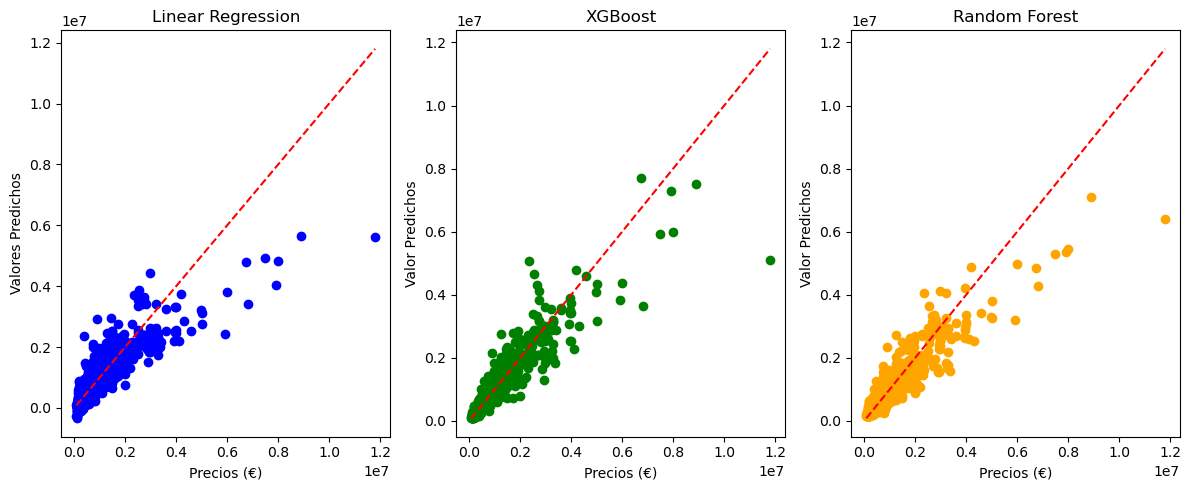

In [12]:
plot_results(y_test, y_pred_lr, y_pred_xgb, y_pred_rf)

### A.2. Error de Valores predichos vs Valores reales

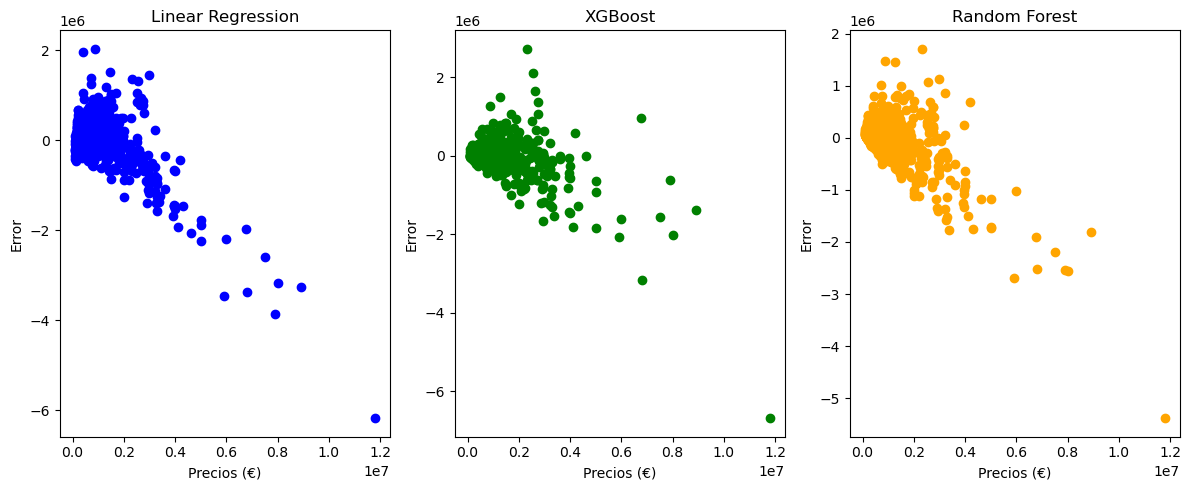

In [13]:
plot_error(y_test, y_pred_lr, y_pred_xgb, y_pred_rf)

### A.3. Porcentaje de Error Absoluto

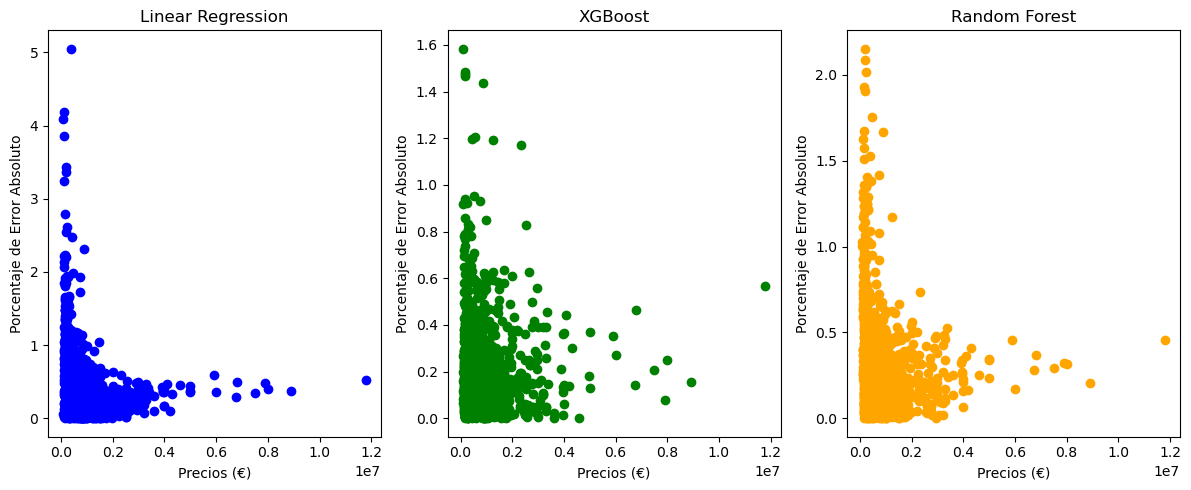

In [14]:
plot_porcentaje_error(y_test, y_pred_lr ,y_pred_xgb, y_pred_rf)

### 2. Modelos de entrenamiento sin Outliers

In [15]:
# Eliminamos los Outliers definiendo un percentil del 75%
upper_limit = viviendas2['Precio'].quantile(0.75)
print('Precio máximo para el rango de precios que usaremos: ', upper_limit)

# Filtra los outliers basados en los percentiles (5.507 filas restantes)
viviendas_cleaned = viviendas2[(viviendas2['Precio'] < upper_limit)] 

Precio máximo para el rango de precios que usaremos:  950000.0


In [16]:
X = viviendas_cleaned.drop('Precio', axis=1)
y = viviendas_cleaned['Precio']

# Separamos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.1 Regresión Linear

In [17]:
y_pred_lr_out, mse_lr_out, mse_squared_lr_out, mape_lr_out ,r2_lr_out = lr_model_out(viviendas_cleaned)

Mean Squared Error: 12513009587.421265
Mean Squared Error Sqrt: 111861.56
Mean Absolute Percentage Error: 0.24
R-squared score: 0.7899574174875225


### 2.2. XGBoost

In [18]:
#best_model_xgb_out = run_grid_search_xgb_out(X_train, y_train)

In [19]:
# # Guardar el modelo en un archivo .pkl
# with open('best_model_xgb_out.pkl', 'wb') as file:
#     pickle.dump(best_model_xgb_out, file)
    
# Cargar el modelo desde el archivo .pkl
with open('best_model_xgb_out.pkl', 'rb') as file:
    best_model_xgb_out = pickle.load(file)

best_model_xgb_out

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.01, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [20]:
# Calculamos las predicciones
y_pred_xgb_out = best_model_xgb_out.predict(X_test)

# Calculamos el Mean Squared Error (MSE)
mse_xgb_out = mean_squared_error(y_test, y_pred_xgb_out)
mse_squared_xgb_out = np.sqrt(mse_xgb_out).round(2)

# Calculamos el Mean Absolute Percentage Error (MAPE)
mape_xgb_out = mean_absolute_percentage_error(y_test, y_pred_xgb_out).round(2)

# Calculamos el R-squared (R2) score
r2_xgb_out = r2_score(y_test, y_pred_xgb_out)

# Resultados
print('----------------------------------------------------')
print('Mean Squared Error:', mse_xgb_out)
print('Mean Squared Error Sqrt:', mse_squared_xgb_out)
print('Mean Absolute Percentage Error:', mape_xgb_out)
print('R-squared score:', r2_xgb_out)

----------------------------------------------------
Mean Squared Error: 7366605131.2923355
Mean Squared Error Sqrt: 85828.93
Mean Absolute Percentage Error: 0.16
R-squared score: 0.8763446351322436


### 2.3. Random Forest

In [21]:
#best_model_rf_out = run_grid_search_rf_out(X_train, y_train)

In [22]:
# # Guardar el modelo en un archivo .pkl
# with open('best_model_rf_out.pkl', 'wb') as file:
#     pickle.dump(best_model_rf_out, file)

# Cargar el modelo desde el archivo .pkl
with open('best_model_rf_out.pkl', 'rb') as file:
    best_model_rf_out = pickle.load(file)

best_model_rf_out

RandomForestRegressor(max_depth=9, max_features=0.7, min_samples_leaf=4,
                      min_samples_split=10, n_estimators=500, random_state=42)

In [23]:
# Calculamos las predicciones
y_pred_rf_out = best_model_rf_out.predict(X_test)

# Calculamos el Mean Squared Error (MSE)
mse_rf_out = mean_squared_error(y_test, y_pred_rf_out)
mse_squared_rf_out = np.sqrt(mse_rf_out).round(2)

# Calculamos el Mean Absolute Percentage Error (MAPE)
mape_rf_out = mean_absolute_percentage_error(y_test, y_pred_rf_out).round(2)

# Calculamos el R-squared (R2) score
r2_rf_out = r2_score(y_test, y_pred_rf_out)

# Resultados
print('----------------------------------------------------')
print('Mean Squared Error:', mse_rf_out)
print('Mean Squared Error Sqrt:', mse_squared_rf_out)
print('Mean Absolute Percentage Error:', mape_rf_out)
print('R-squared score:', r2_rf_out)

----------------------------------------------------
Mean Squared Error: 10696460317.719967
Mean Squared Error Sqrt: 103423.69
Mean Absolute Percentage Error: 0.22
R-squared score: 0.8204498979098801


### B. Graficamos los resultados

### B.1. Resultados predichos vs Resultados reales

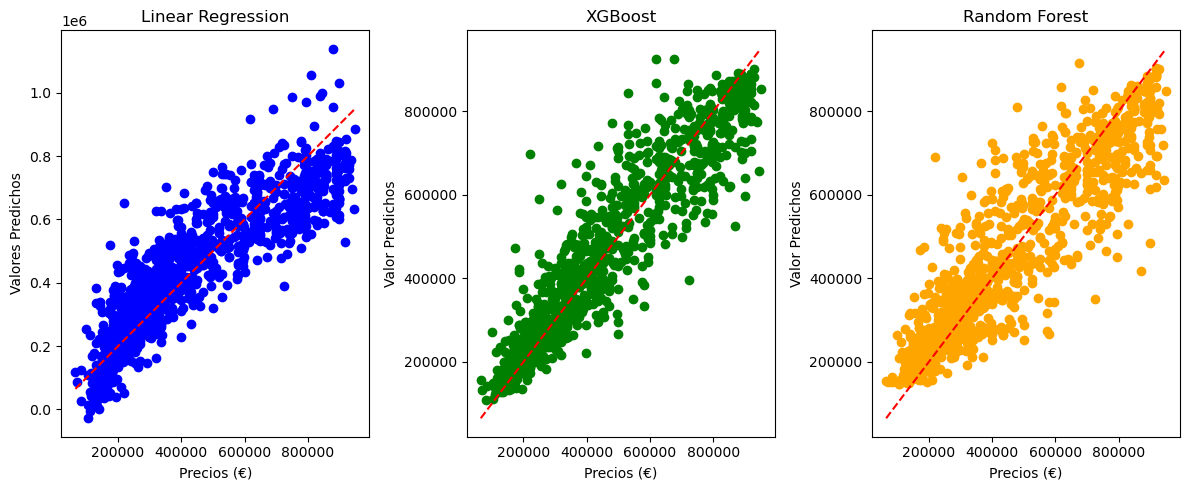

In [24]:
plot_results_out(y_test, y_pred_lr_out, y_pred_xgb_out, y_pred_rf_out)

### B.2. Error de Resultados predichos vs Resultados reales

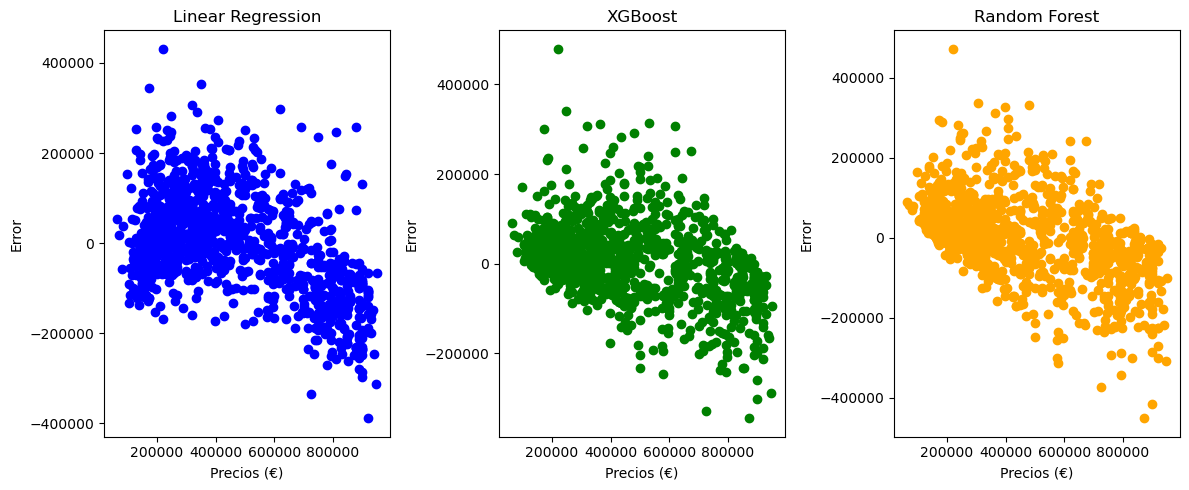

In [25]:
plot_error_out(y_test, y_pred_lr_out, y_pred_xgb_out, y_pred_rf_out)

### B.3. Porcentaje de Error Absoluto

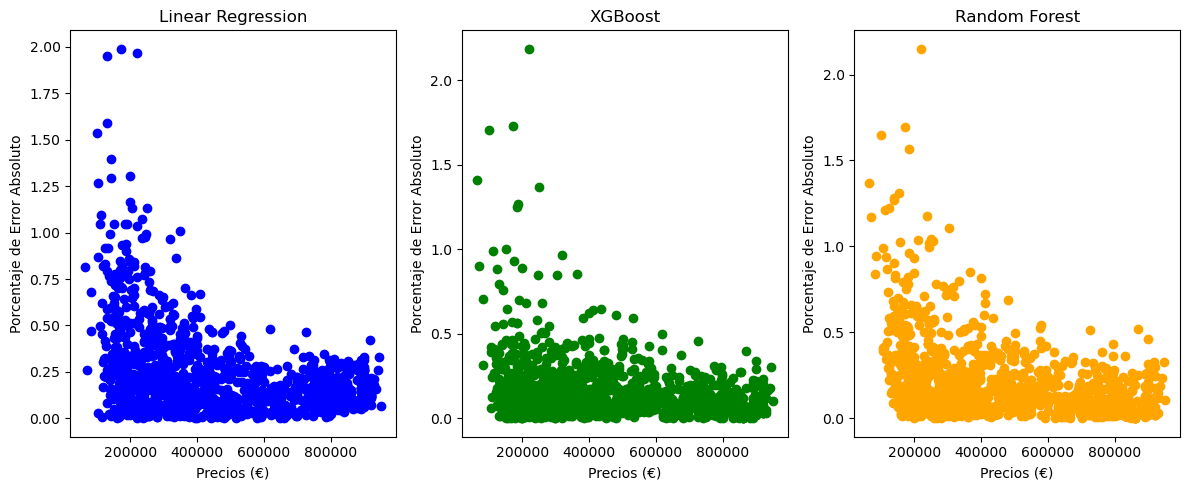

In [26]:
plot_porcentaje_error_out(y_test, y_pred_lr_out, y_pred_xgb_out, y_pred_rf_out)

In [27]:
results = {
    'Modelo': ['Regresión Linear', 'XGBoost', 'Random Forest'],
    'Error con Outliers ': [mse_squared_lr, mse_squared_xgb, mse_squared_rf],
    'Score con Outliers': [r2_lr, r2_xgb, r2_rf],
    'Mape con Outliers': [mape_lr ,mape_xgb, mape_rf],
    'Error sin Outliers': [mse_squared_lr_out, mse_squared_xgb_out, mse_squared_rf_out],
    'Score sin Outliers': [r2_lr_out, r2_xgb_out, r2_rf_out],
    'Mape sin Outliers': [mape_lr_out ,mape_xgb_out, mape_rf_out]
}

df_results = pd.DataFrame(results)

In [28]:
df_results

,Modelo,Error con Outliers,Score con Outliers,Mape con Outliers,Error sin Outliers,Score sin Outliers,Mape sin Outliers
0,Regresión Linear,443622.24,0.761690,0.39,111861.56,0.789957,0.24
1,XGBoost,343563.63,0.857068,0.19,85828.93,0.876345,0.16
2,Random Forest,356518.08,0.846086,0.26,103423.69,0.820450,0.22
